In [1]:
import numpy as np
import pandas as pd
from radardetseval.conversions.objects_into_polyline import object_into_polyline
from AptivDataExtractors.utilities.MathFunctions import calc_position_in_bounding_box
import matplotlib.pyplot as plt

from radardetseval.visualization.plot_polyline import plot_polyline, plot_polyline_range_rates
from radardetseval.visualization.plot_sensor import plot_sensor
from radardetseval.visualization.plot_object import plot_object


Bad key "text.kerning_factor" on line 4 in
c:\users\lz7c3c\wkspaces\aspe0000_00_common\sandbox\radardetectionsevaluation\.venv_pe\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Data preparation

In [3]:
    single_row_dict = {
        'id': 5,
        'position_x': 6.0,
        'position_y': 5.0,
        'position_variance_x': 1.0,
        'position_variance_y': 2.0,
        'position_covariance': 0.4,
        'velocity_otg_x': 4.0,
        'velocity_otg_y': 1.0,
        'velocity_otg_variance_x': 0.1,
        'velocity_otg_variance_y': 0.4,
        'velocity_otg_covariance': 0.05,
        'bounding_box_dimensions_x': 4.0,
        'bounding_box_dimensions_y': 2.0,
        'bounding_box_orientation': np.deg2rad(15.0),
        'bounding_box_refpoint_long_offset_ratio': 0.5,
        'bounding_box_refpoint_lat_offset_ratio': 0.5,
        'yaw_rate': np.deg2rad(40.0),  # [rad/s]
    }
    single_obj_series = pd.Series(single_row_dict)
    c_x, c_y = calc_position_in_bounding_box(single_obj_series.position_x, single_obj_series.position_y,
                                             single_obj_series.bounding_box_dimensions_x,
                                             single_obj_series.bounding_box_dimensions_y,
                                             single_obj_series.bounding_box_orientation,
                                             single_obj_series.bounding_box_refpoint_long_offset_ratio,
                                             single_obj_series.bounding_box_refpoint_lat_offset_ratio,
                                             0.5, 0.5)
    single_obj_series['center_x'] = c_x
    single_obj_series['center_y'] = c_y


## Conversion

In [4]:
rectangle = object_into_polyline(single_obj_series)

## Numbercial repsentation

In [5]:
single_obj_series

id                                         5.000000
position_x                                 6.000000
position_y                                 5.000000
position_variance_x                        1.000000
position_variance_y                        2.000000
position_covariance                        0.400000
velocity_otg_x                             4.000000
velocity_otg_y                             1.000000
velocity_otg_variance_x                    0.100000
velocity_otg_variance_y                    0.400000
velocity_otg_covariance                    0.050000
bounding_box_dimensions_x                  4.000000
bounding_box_dimensions_y                  2.000000
bounding_box_orientation                   0.261799
bounding_box_refpoint_long_offset_ratio    0.500000
bounding_box_refpoint_lat_offset_ratio     0.500000
yaw_rate                                   0.698132
center_x                                   6.000000
center_y                                   5.000000
dtype: float

In [6]:
rectangle

In [7]:
rectangle.signals

,unique_id,vertex_id,x,y,vx,vy,cov_matrix
0,0.0,0.0,4.326967,3.516436,5.035723,-0.167997,"[[1.0, 0.4, 0.0, 0.0], [0.4, 2.0, 0.0, 0.0], [..."
1,0.0,1.0,8.190671,4.551712,4.312964,2.529377,"[[1.0, 0.4, 0.0, 0.0], [0.4, 2.0, 0.0, 0.0], [..."
2,0.0,2.0,7.673033,6.483564,2.964277,2.167997,"[[1.0, 0.4, 0.0, 0.0], [0.4, 2.0, 0.0, 0.0], [..."
3,0.0,3.0,3.809329,5.448288,3.687036,-0.529377,"[[1.0, 0.4, 0.0, 0.0], [0.4, 2.0, 0.0, 0.0], [..."
4,0.0,4.0,4.326967,3.516436,5.035723,-0.167997,"[[1.0, 0.4, 0.0, 0.0], [0.4, 2.0, 0.0, 0.0], [..."


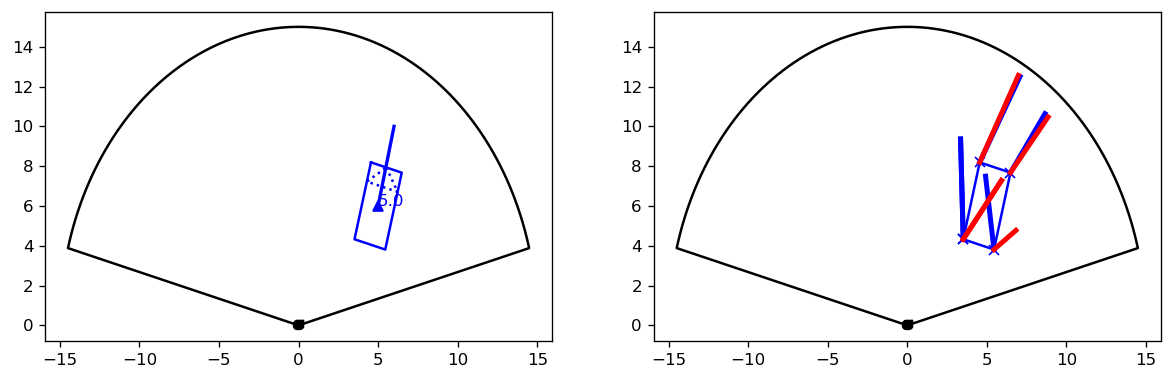

In [9]:
fig1=plt.figure(figsize=(12, 8), dpi= 120, facecolor='w', edgecolor='k')

ax1 = plt.subplot(2, 2, 1)
plot_sensor(ax1, azimuth=np.deg2rad(75.0), max_range=15.0)
plot_object(ax1, single_obj_series.id, single_obj_series.position_x, single_obj_series.position_y, 
           single_obj_series.velocity_otg_x, single_obj_series.velocity_otg_y, 
           single_obj_series.center_x, single_obj_series.center_y, 
           single_obj_series.bounding_box_dimensions_x, single_obj_series.bounding_box_dimensions_y, 
           single_obj_series.bounding_box_orientation, velocity_scale=1.0, color='b')

ax2 = plt.subplot(2, 2, 2)
plot_sensor(ax2, azimuth=np.deg2rad(75.0), max_range=15.0)
plot_polyline(ax2, rectangle, color='b', label = 'Rectangle polyline')
plot_polyline_range_rates(ax2, rectangle, label = 'Rectangle: range rates')